# Computer vision - Laboratory

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

1)	Segmentation of video shots with static scenes.

2) Background substraction.

3)	Segmentation of images.

In order to successfuly complete this practicum it is necessary to understand the following theory concepts: background substraction, K-means clustering, etc.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.

## 3.1 Background substraction methods


Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, remove all the "artifacts" considered as foreground related to movement extracting the background images.

Note: One of the applications of these methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras.

Read and visualize the sequence of images "images/Barcelona-sequence"
Hint: In order to read a  collection of images, we wil use the function animation.FuncAnimation [https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html].

Observe in the following example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

<IPython.core.display.Javascript object>


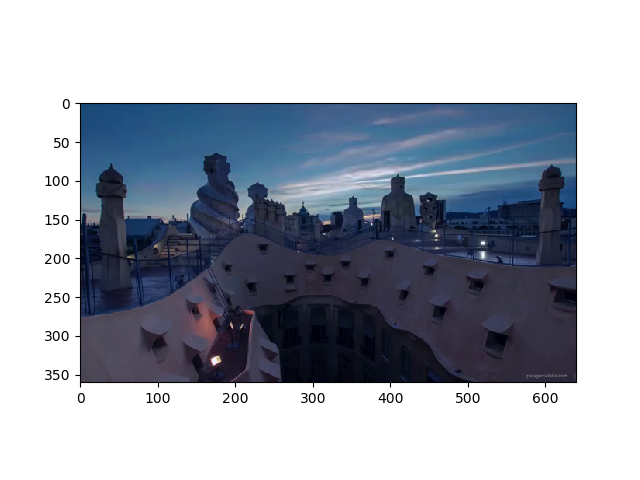

In [1]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder

import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(ic[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*5]) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=50, repeat= False)

a) Find where a shot (scene) finishes and the following starts (boundaries). Each of the scenes in a video is usually called 'shot'. Which measure can be used in order to visually distinguish the shots in a plot? Explain your solution.

Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">

**Hint:** take the following example of video and temporal plot visualization as a template. The plot must be replaced by a frame by frame measure to be defined by you, being applicable to distinguish the shots.

- If you need to convert the image to float, the command is: img_as_float()
- If you need the histogram, it is in skimage.exposure

In [ ]:
#Run this for the correct view of the plots, since we changed the plugin in the last exercice
%matplotlib inline

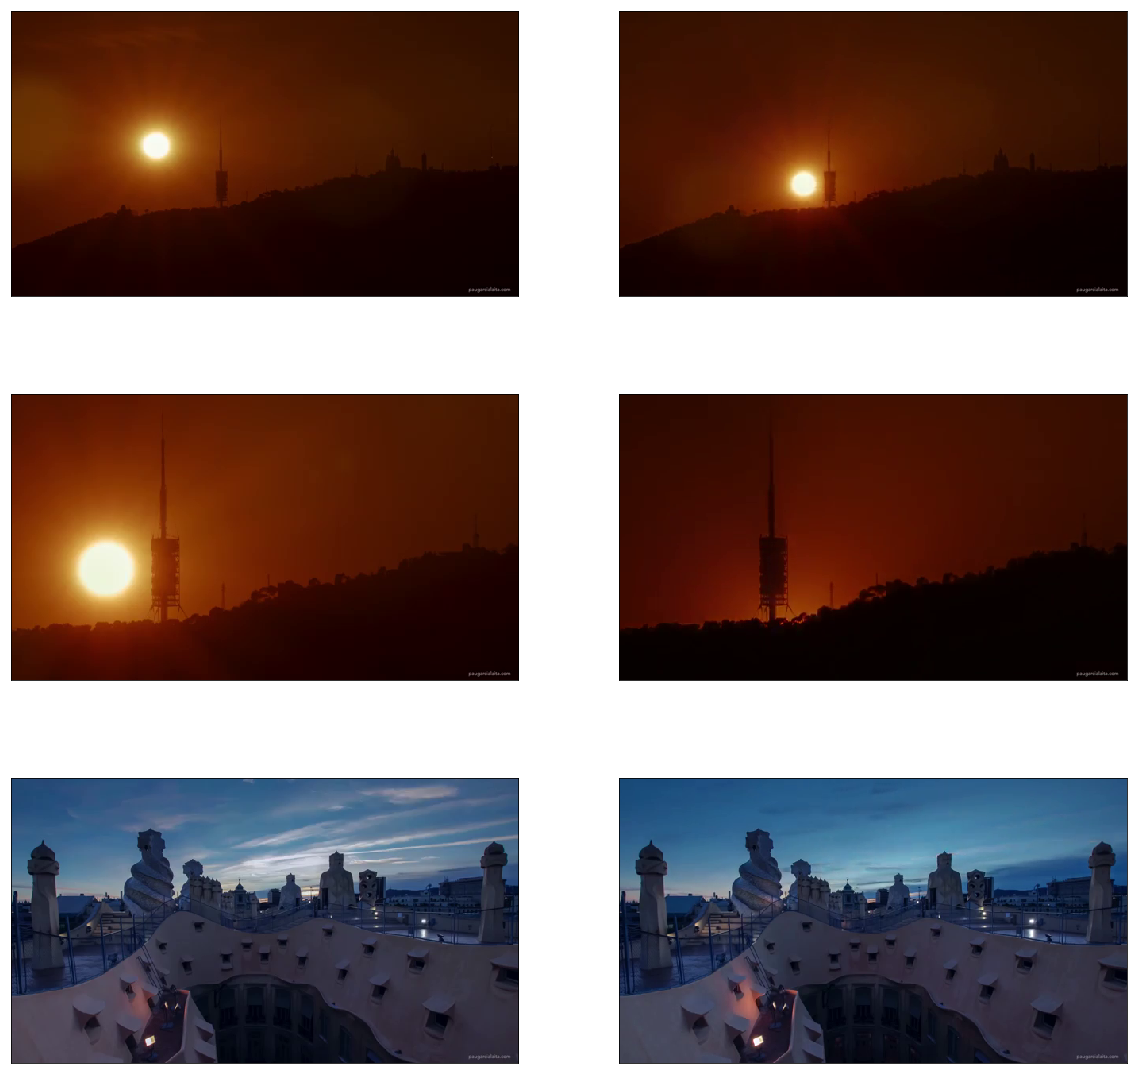

In [2]:
from skimage import img_as_float
from skimage import exposure
import numpy as np

%matplotlib inline
nbins = 64 #We decided to use 64 bins
changes = []

his_r = [] #Histogram for each color
his_g = []
his_b = []


valors_t = [] #List where we put the median

for i in range(len(ic)): #For each frame
    im_current = ic[i]
    
    #For each channel (R,G,B) we made his histogram
    current_his_r, bins = exposure.histogram(img_as_float(im_current[:,:,0]), nbins)
    current_his_g, bins = exposure.histogram(img_as_float(im_current[:,:,1]), nbins)
    current_his_b, bins = exposure.histogram(img_as_float(im_current[:,:,2]), nbins)
    if len(his_r) != 0:
        r = []
        g = []
        b = []
        for j in range(len(current_his_r)):
            
            r.append(current_his_r[j] - his_r[j])
            his_r[j] = current_his_r[j]
            g.append(current_his_g[j] - his_g[j])
            his_g[j] = current_his_g[j]
            b.append(current_his_b[j] - his_b[j])
            his_b[j] = current_his_b[j]
        #Take the absolut value of the medians
        valors_t.append(abs((np.median(r) + np.median(g) + np.median(b))/3))
    else:
        for j in range(len(current_his_r)): #Take the histograms
            his_r.append(current_his_r[j])
            his_g.append(current_his_g[j])
            his_b.append(current_his_b[j])
#Boolean list for each frame. If the median stored in valors_t is higher than 100, it means theres a change
indexs = np.array(valors_t)>100

#This list stores the "change-frame" and the following one.
canvis = [ic[0]]#For the first shot, we append now the first frame

#For each frame (boolean)
for i in range(len(indexs)):
    if indexs[i]: #If its a true one
        canvis.append(ic[i]) #Append it
        if (len(ic) > i): #With this if this code can run even though theres more than 3 changes (any shots)
            canvis.append(ic[i+1]) #Append now the following frame
        
#Show them    
f,axarr = plt.subplots(3,2)
f.set_size_inches(20,20)

axarr[0][0].imshow(canvis[0])
axarr[0][0].xaxis.set_visible(False)
axarr[0][0].yaxis.set_visible(False)

axarr[0][1].imshow(canvis[1])
axarr[0][1].xaxis.set_visible(False)
axarr[0][1].yaxis.set_visible(False)

axarr[1][0].imshow(canvis[2])
axarr[1][0].xaxis.set_visible(False)
axarr[1][0].yaxis.set_visible(False)

axarr[1][1].imshow(canvis[3])
axarr[1][1].xaxis.set_visible(False)
axarr[1][1].yaxis.set_visible(False)

axarr[2][0].imshow(canvis[4])
axarr[2][0].xaxis.set_visible(False)
axarr[2][0].yaxis.set_visible(False)

axarr[2][1].imshow(canvis[5])
axarr[2][1].xaxis.set_visible(False)
axarr[2][1].yaxis.set_visible(False)


plt.show()

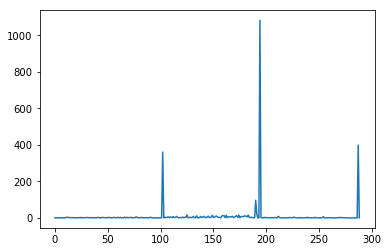

In [9]:
#This plot represents the three changes belonging to each shot. Thanks to him, we can see that the minimum value 
#to note a change its 100
plt.plot(valors_t)
plt.show()

## 3.2 Background substraction

Apply the background substraction algorithm (check theory material).

Visualize, for each shot of the video:
    1) images belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

* **We have a list named punt_inf (punts d'inflexio) that has the index of each "change-frame" (in total, 3 indexs).** 
* **We dont know exaclty what the first question wants, "1) images belonging to the shot", because we can't print all the frames, so we answer like this: the first shot it's represented by 0 till punt_inf[0] (the first index). The second shot it's represented from punt_inf[0] till punt_inf[1] and the last third shot from punt_inf[1] till punt_inf[2].**


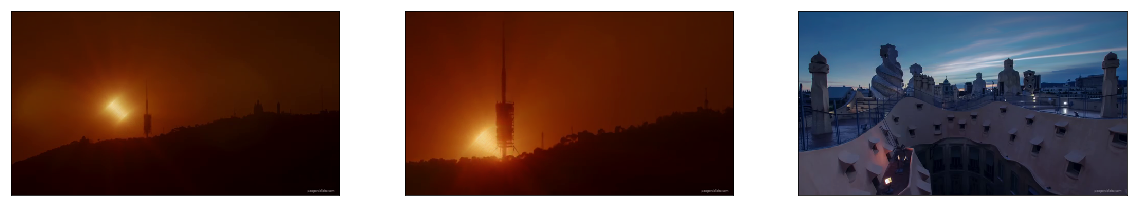

In [3]:
#In this code we take every frame index that represents a change from shot to shot
punt_inf =[]
for i in range(len(indexs)):
    if indexs[i] and (len(ic) > i):
            punt_inf.append(i)
            
#Now we create 3 images (backgrounds) of each frame-change of each shot
ic_bg1 = ic[0:punt_inf[0]]
ic_bg2 = ic[punt_inf[0]+1:punt_inf[1]]
ic_bg3 = ic[punt_inf[1]+1:punt_inf[2]]
    
bg1 = np.zeros(ic[0].shape) #An empty image with the same size

#Now, we find out the median of each channel. Axis = 0 for the color
bg1[:,:,0] = np.median([img_as_float(i[:,:,0]) for i in ic_bg1], axis = 0)
bg1[:,:,1] = np.median([img_as_float(i[:,:,1]) for i in ic_bg1], axis = 0)
bg1[:,:,2] = np.median([img_as_float(i[:,:,2]) for i in ic_bg1], axis = 0)

#Repeat this process with the 3 change-frames

bg2 = np.zeros(ic[punt_inf[1]].shape)

bg2[:,:,0] = np.median([img_as_float(i[:,:,0]) for i in ic_bg2], axis = 0)
bg2[:,:,1] = np.median([img_as_float(i[:,:,1]) for i in ic_bg2], axis = 0)
bg2[:,:,2] = np.median([img_as_float(i[:,:,2]) for i in ic_bg2], axis = 0)

bg3 = np.zeros(ic[punt_inf[1]+1].shape)

bg3[:,:,0] = np.median([img_as_float(i[:,:,0]) for i in ic_bg3], axis = 0)
bg3[:,:,1] = np.median([img_as_float(i[:,:,1]) for i in ic_bg3], axis = 0)
bg3[:,:,2] = np.median([img_as_float(i[:,:,2]) for i in ic_bg3], axis = 0)

#Show them
f,axarr = plt.subplots(1,3)
f.set_size_inches(20,20)

axarr[0].imshow(bg1)
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)

axarr[1].imshow(bg2)
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)

axarr[2].imshow(bg3)
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)

plt.show()

<IPython.core.display.Javascript object>


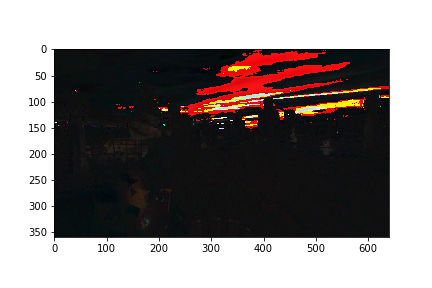

In [26]:
#ATTENTION: EXECUTE IT TWO TIMES IF THE FIRST ONE DIDN'T WORK (NBAGG PROBLEMS, AT LEAST, IN MY PC)

import matplotlib.animation as animation
from skimage import filters
%matplotlib nbagg 

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
# Reading a sequence of images from a folder

frames = [] #List of frames

for i in range(len(ic)): #For ever frame
    if i <= punt_inf[0]: #If its a frame from the shot 1,
        img = img_as_float(ic[i]) - bg1 #We substract to him the background, to get the foreground
        #Now, we apply a smooth filter. With this, we win some color correction. If we dont, the video gets weird
        thresh = filters.threshold_li(img)
        img_fil = img - thresh
    #Repeat the process for every shot
    if i > punt_inf[0] and i <= punt_inf[1]:
        img = img_as_float(ic[i]) - bg2
        thresh = filters.threshold_li(img)
        img_fil = img - thresh
    if i > punt_inf[1] and i <= punt_inf[2]:
        img = img_as_float(ic[i]) - bg3
        thresh = filters.threshold_li(img)
        img_fil = img - thresh

    frames.append(img_fil)

#Show the ImageCollection changed
#Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(frames[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(frames[i]) #Changing the content of the canvas
    return im, #to return a tuple!
ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=290, repeat= False)

Comment your implementation including details. What happens if the shots are not correctly extracted? What happens if you find too many shots in the video? What do the static background images represent? In which situations does the algorithm work and in which it does not? What happens if you substract the background image from the original one?

Do you see any additional application for this algorithm?

**[OPTIONAL]**
Apply the algorithm to some other static video that you found.

* If they are not correctly extracted we will se blurry images and weird forms, because every frame is different than the previous and next one
* Statatic background images represent the background, the static part of each shot that doesnt change on a single shot
* This algorithm does not work when we have non-static shots. In other words, it doesn't work on a conventional vídeo, where there isn't any static part.
* If I substract the background image from the original one i get the foreground

## 3.3 Clustering methods on the RGB-XY space

a) Read any image from the folder 'images' and segment it using Felzenszwalbs's method. Test different parameters in order to obtain a good image segmentation. How does each parameter behave? Which are the optimal values? Comment what algorithm is the method based in up to 3 lines most.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)
- Add title to the figures to explain what is displayed.

In [21]:
#Run this for the correct view of the plots, since we changed the plugin in the last exercice
%matplotlib inline

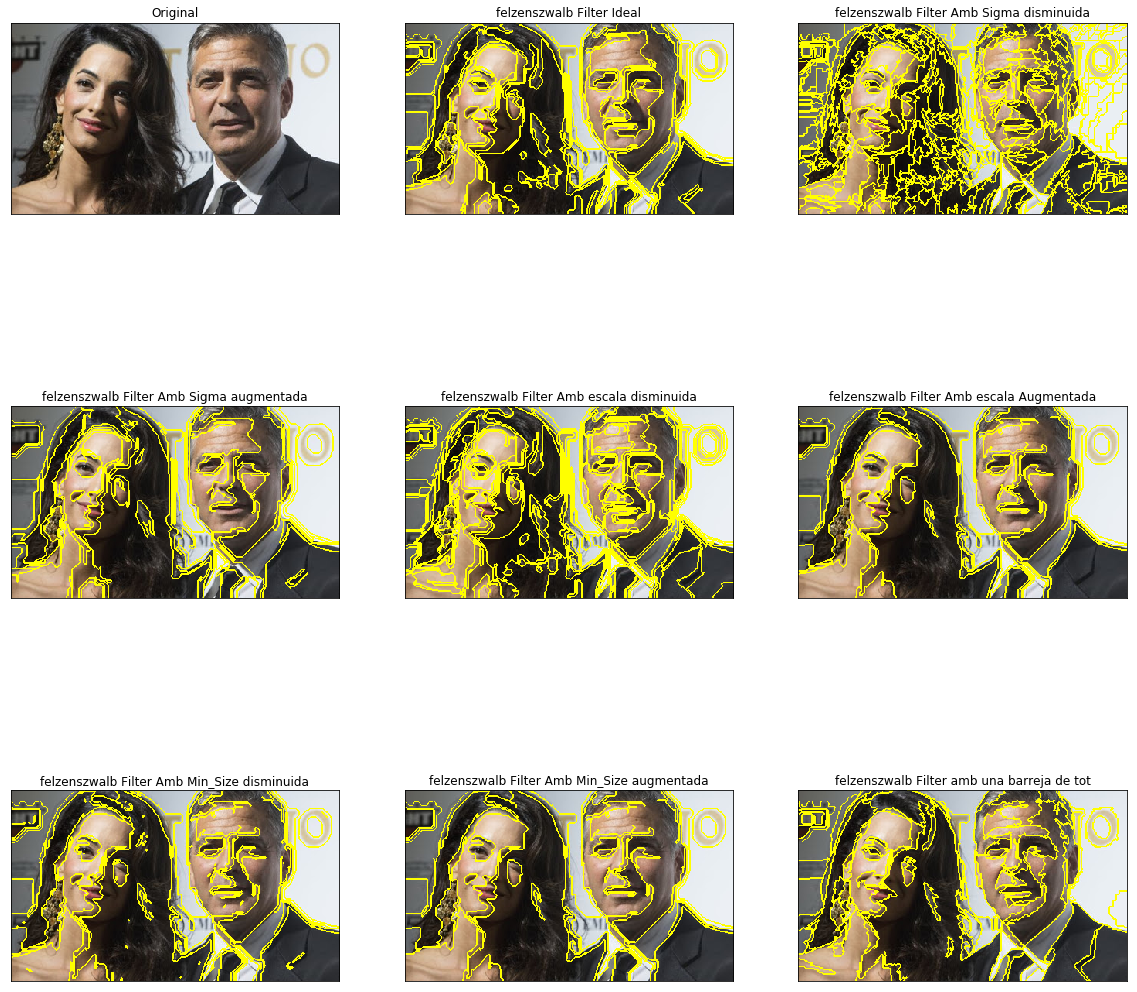

In [81]:
from skimage.segmentation import mark_boundaries, felzenszwalb

img = io.imread("images/clooney.jpg")

#Felzenswalb method parametres
#Scale specifies the size of the clusters. The bigger the scale is, the bigger the cluster will be.
#Sigma specifies the size of the gaussian kernel that we use.

segments_f_ideal = felzenszwalb(img, scale=100, sigma=2, min_size=50) #The ideal parametres for us

#Those are experiments 
segments_sigma = felzenszwalb(img, scale=100, sigma=0.3, min_size=50)

segments_bigSima = felzenszwalb(img, scale=100, sigma=3, min_size=50)

segments_min_escale = felzenszwalb(img, scale=50, sigma=2, min_size=50)

segments_max_escale = felzenszwalb(img, scale=200, sigma=2, min_size=50)

segments_min_size = felzenszwalb(img, scale=200, sigma=2, min_size=1)

segments_max_size = felzenszwalb(img, scale=200, sigma=2, min_size=100)

segments_weird = felzenszwalb(img, scale=200, sigma=0.5, min_size=100)

#Show them
f,axarr = plt.subplots(3,3)
f.set_size_inches(20,20)

axarr[0][0].imshow(img)
axarr[0][0].xaxis.set_visible(False)
axarr[0][0].yaxis.set_visible(False)
axarr[0][0].set_title('Original')

axarr[0][1].imshow(mark_boundaries(img, segments_f_ideal))
axarr[0][1].xaxis.set_visible(False)
axarr[0][1].yaxis.set_visible(False)
axarr[0][1].set_title('felzenszwalb Filter Ideal')

axarr[0][2].imshow(mark_boundaries(img, segments_sigma))
axarr[0][2].xaxis.set_visible(False)
axarr[0][2].yaxis.set_visible(False)
axarr[0][2].set_title('felzenszwalb Filter Amb Sigma disminuida')

axarr[1][0].imshow(mark_boundaries(img, segments_bigSima))
axarr[1][0].xaxis.set_visible(False)
axarr[1][0].yaxis.set_visible(False)
axarr[1][0].set_title('felzenszwalb Filter Amb Sigma augmentada')
                   
axarr[1][1].imshow(mark_boundaries(img, segments_min_escale))
axarr[1][1].xaxis.set_visible(False)
axarr[1][1].yaxis.set_visible(False)
axarr[1][1].set_title('felzenszwalb Filter Amb escala disminuida')

axarr[1][2].imshow(mark_boundaries(img, segments_max_escale))
axarr[1][2].xaxis.set_visible(False)
axarr[1][2].yaxis.set_visible(False)
axarr[1][2].set_title('felzenszwalb Filter Amb escala Augmentada')

axarr[2][0].imshow(mark_boundaries(img, segments_min_size))
axarr[2][0].xaxis.set_visible(False)
axarr[2][0].yaxis.set_visible(False)
axarr[2][0].set_title('felzenszwalb Filter Amb Min_Size disminuida')

axarr[2][1].imshow(mark_boundaries(img, segments_max_size))
axarr[2][1].xaxis.set_visible(False)
axarr[2][1].yaxis.set_visible(False)
axarr[2][1].set_title('felzenszwalb Filter Amb Min_Size augmentada')

axarr[2][2].imshow(mark_boundaries(img, segments_weird))
axarr[2][2].xaxis.set_visible(False)
axarr[2][2].yaxis.set_visible(False)
axarr[2][2].set_title('felzenszwalb Filter amb una barreja de tot')

plt.show()

#Those experiments are made moving up & down each parameter in compared to the 'ideal' one

#Touching the sigma, we can se that the smaller it is, more bounderies are found, ruining in some way the image
#For example, we can see that Clooney's forehead has 3 wrinkles. With a smaller sigma, its detected like a boundery. With
#a bigger one, its not

#With the scale we can see how the bounderies width grows (in yellow color). The bigger the scale is, the bigger its width is

#With min_size we couldn't find any notable diference. In fact, just one, in the Clooney's jacket. 

#The last image is a mix of those experiments

**Comment what algorithm is the method based**

* The agglomerative clustering: put together things that belong together. We decide what is similar to what (if two things are different or not) with the weight of the edge that connects two nodes (two similar things). If Dif(C1,C2) is bigger than this maximum weight, we determine that theres a boundery for segmentation

b) Segment the previous image using SLIC algorithm. Test different parameters in order to obtain a good image segmentation. How does each parameter behave? Upt o your opinion, which are the optimal values? Comment what algorithm is the method based in up to 3 lines.

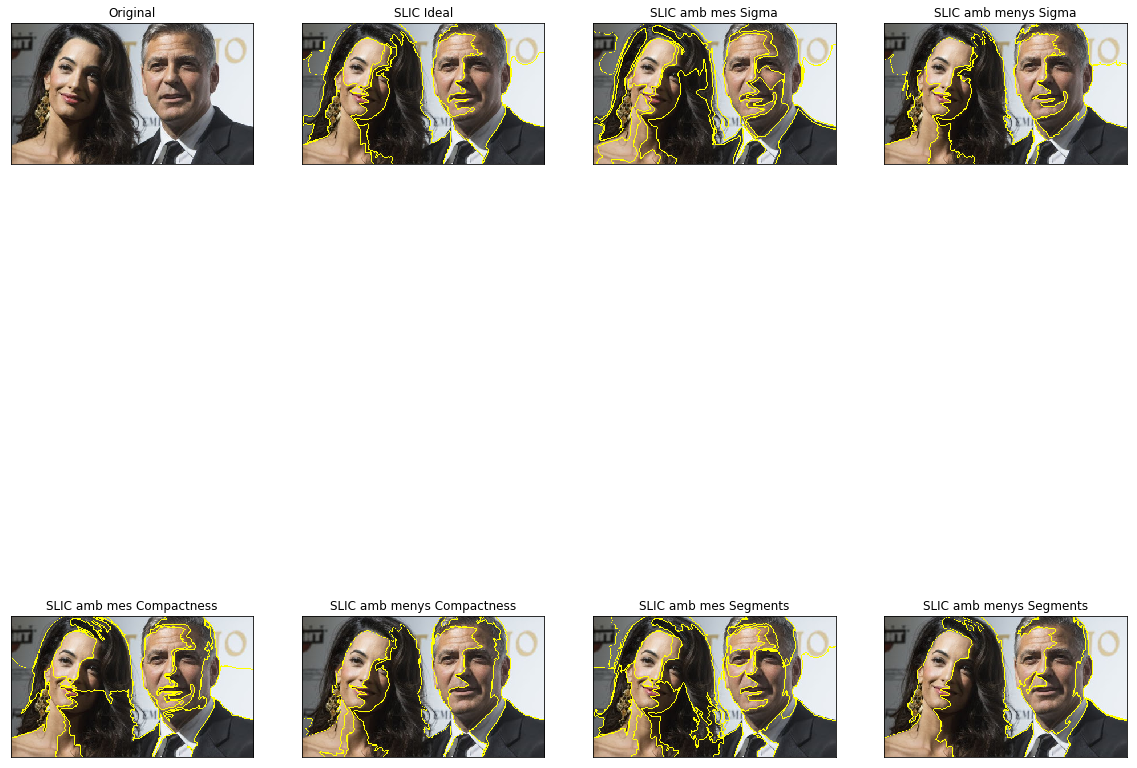

In [83]:
from skimage.segmentation import slic

#Slic Method:
#N_segments especifies an aproximate number of segments that we'll obtain
#compactness balances an aproximation of the color and the space
#Sigma especifies the weight of the gaussian filter applied

segments_s_ideal = slic(img, n_segments=20, compactness=5, sigma=1) #This is the ideal for us

#Those are experiments
segments_bigSigma = slic(img, n_segments=20, compactness=5, sigma=3)

segments_lessSigma = slic(img, n_segments=20, compactness=5, sigma=0.5)

segments_lessSeg = slic(img, n_segments=10, compactness=5, sigma=1)

segments_bigSeg = slic(img, n_segments=30, compactness=5, sigma=1)

segments_lessCom = slic(img, n_segments=20, compactness=0.1, sigma=1)

segments_bigCom = slic(img, n_segments=20, compactness=8, sigma=1)

#Show them
f,axarr = plt.subplots(2,4)
f.set_size_inches(20,20)

axarr[0][0].imshow(img)
axarr[0][0].xaxis.set_visible(False)
axarr[0][0].yaxis.set_visible(False)
axarr[0][0].set_title('Original')

axarr[0][1].imshow(mark_boundaries(img, segments_s_ideal))
axarr[0][1].xaxis.set_visible(False)
axarr[0][1].yaxis.set_visible(False)
axarr[0][1].set_title('SLIC Ideal')

axarr[0][2].imshow(mark_boundaries(img, segments_bigSigma))
axarr[0][2].xaxis.set_visible(False)
axarr[0][2].yaxis.set_visible(False)
axarr[0][2].set_title('SLIC amb mes Sigma')

axarr[0][3].imshow(mark_boundaries(img, segments_lessSigma))
axarr[0][3].xaxis.set_visible(False)
axarr[0][3].yaxis.set_visible(False)
axarr[0][3].set_title('SLIC amb menys Sigma')

axarr[1][0].imshow(mark_boundaries(img, segments_bigCom))
axarr[1][0].xaxis.set_visible(False)
axarr[1][0].yaxis.set_visible(False)
axarr[1][0].set_title('SLIC amb mes Compactness')

axarr[1][1].imshow(mark_boundaries(img, segments_lessCom))
axarr[1][1].xaxis.set_visible(False)
axarr[1][1].yaxis.set_visible(False)
axarr[1][1].set_title('SLIC amb menys Compactness')

axarr[1][2].imshow(mark_boundaries(img, segments_bigSeg))
axarr[1][2].xaxis.set_visible(False)
axarr[1][2].yaxis.set_visible(False)
axarr[1][2].set_title('SLIC amb mes Segments')

axarr[1][3].imshow(mark_boundaries(img, segments_lessSeg))
axarr[1][3].xaxis.set_visible(False)
axarr[1][3].yaxis.set_visible(False)
axarr[1][3].set_title('SLIC amb menys Segments')

plt.show()

#Those experiments are made moving up & down each parameter in compared to the 'ideal' one

#With  more or less sigma we can see more or less bounderies. In fact, more sigma, more bounderies, cause the 
#Gaussian filter has more or less strenght.

#With compactness we can see this bounderies more or less definded. In fact, with more compactness, more solid bounderies

#With Segments things are more clear. In aproximate way, it specifies the number of segments that are shown in the image,
#as we can easily see below:

**Comment what algorithm is the method based**

* With the k-means clustering. This method initializes k clusters centers randomly. Then, it determinates points and its closest one. For each of them, we put it into the i-cluster. Finally, for two diferents clusters, we solve the difference between its points, with his mean. If this one changes, we repeat the process with more points.

c) Plot the original image and the results of both algorithms in a 1x3 subplot. Calculate also the number of segments obtained on the image by each of the algorithms. Comment the differences between each method as well as their advantages and disadvantages.

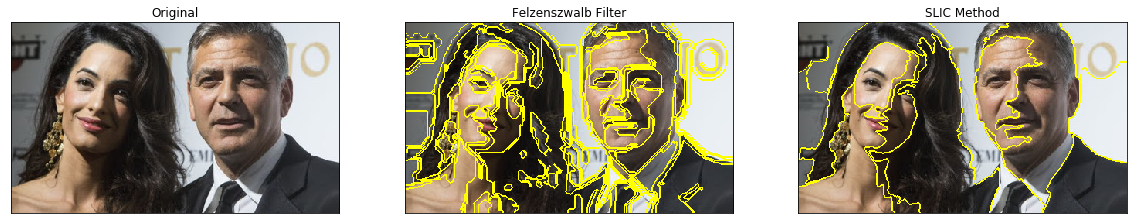

In [84]:
f,axarr = plt.subplots(1,3)
f.set_size_inches(20,20)

axarr[0].imshow(img)
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)
axarr[0].set_title('Original')

axarr[1].imshow(mark_boundaries(img, segments_f_ideal))
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)
axarr[1].set_title('Felzenszwalb Filter')

axarr[2].imshow(mark_boundaries(img, segments_s_ideal))
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)
axarr[2].set_title('SLIC Method')

plt.show()

* We can easily see a more segmentated image, I mean, with more definded and correct bounderies, with the Felzenswalb method. Nevertheless, we can always increase the parameter _segments_ of the SLIC method for more segments, but in some way we'll be ruining the image, as we saw in the experiments of this method.

* We can't count how many segments are in the Felzenswalb method image, but we can change how many segments want lowering on increasing its sigma. In the SLIC method, there are aproximately 20.

* In conclusion, the main diference between this two is how accurate you want to be. In other words, if I want to fragmentate an image in a bigger way, I mean, find all posible bounderies, I will use the Felzenszwalb Method. In the other hand, if I only want the main bounderies, I will use the SLIC Method. 

* We can see this diference in the letter "o" of the background of the image. Felzenszwalb method detects and bounders the "o" letter perfecly, while SLIC method just bounders its lower part. Can we bounder all the "o" letter with the SLIC method? Sure, with a bigger sigma or increasing the number of segments, but we'll be ruining the image because it will appear more other bounderies, like in Clooney's face or in the hair of the girl.